# Framingham Heart Study Exploratory Data Analysis



---


# **<a id="Content" style="color:##fadc75;">Table of Contents</a>**

[1. Framingham Heart Study Introduction](#scrollTo=8TgDKJMT1Gc1&line=5&uniqifier=1)

[2. Data Information](#scrollTo=v6Cn6HEP2qn8&line=5&uniqifier=1)

[3. Data Preparation](#scrollTo=D9ejXv1x4Fha&line=9&uniqifier=1)

>[Column Description](#scrollTo=sH5vQJtM47Hc&line=5&uniqifier=1)

[4. Data Cleaning](#scrollTo=9nfYKGv49WvU&line=6&uniqifier=1)

>[Investigating Null Values](#scrollTo=ivgZrs8dGIsx&line=5&uniqifier=1)

>[Treating Null Values](#scrollTo=ePiMijSoMJfp&line=6&uniqifier=1)

>[Replacing a column](#scrollTo=vtnK2QrpxFMo&line=6&uniqifier=1)

[5. Data Exploration](#scrollTo=zvg6h4hBt_km&line=5&uniqifier=1)

>[Question 1: Over the study how many times people were told that they are under risk of developing coronary heart disease?](#scrollTo=oIOArVuVuVFc&line=6&uniqifier=1)

>[Question 2: What is the average age of the people who were told that they are under risk of CHD?](#scrollTo=KXS10b8mevfp&line=8&uniqifier=1)

>[Question 3: What's the average heart rate of the people studied under the Framingham Heart Study?](#scrollTo=SPSE5TsJz5aR&line=5&uniqifier=1)

>[Question 4: What's the distribution of education level for the city of Framingham?](#scrollTo=vNuxJkUa1HhJ&line=3&uniqifier=1)

>[Question 5: What's the distribution of diseases between genders?](#scrollTo=rYcM_F31AegX&line=8&uniqifier=1)

>[Question 6: Is there a higher risk of heart disease for individuals who smoke more than the average?](#scrollTo=akl5l5RZ_aBX&line=9&uniqifier=1)

>[Question 7: Is there a higher likelihood of developing diabetes among individuals who are overweight?](#scrollTo=mPNTTGYhS20m&line=6&uniqifier=1)

>[Question 8: How do diastolic and systolic blood pressure measurements relate to the prevalence of hypertension (prevalentHyp) in the Framingham Heart Study dataset?](#scrollTo=Y8mD6yKJn0LJ&line=8&uniqifier=1)

[6. Conclusion](#scrollTo=4Y6vPwj-0ijy&line=3&uniqifier=1)

[7. References](#scrollTo=5Q_z_ARnQWXH&line=14&uniqifier=1)




---


## Framingham Heart Study Introduction

The Framingham Heart Study is one of the most influential and long-running epidemiological studies in the world. It has provided critical insights into cardiovascular disease risk factors, which have had a significant impact on public health. The FHS dataset contains a wealth of information on the health and lifestyles of its participants, making it a valuable resource for researchers. In an educational setting it's also a way to gain experience in handling large, real-world datasets.



---


## Data Information
The Framingham Heart Study dataset is a robust collection of epidemiological data focused on cardiovascular health, renowned for its longevity and comprehensive nature. Spanning multiple generations, this dataset encompasses demographic details, clinical measurements (e.g., blood pressure, cholesterol levels), lifestyle factors (smoking, physical activity, diet), medical histories, medication usage, genetics, and cardiovascular events.



---


## Data Preparation


This section covers importing the relevant libraries and the dataset, learning the basic info about the dataset and observing the first few rows of the dataset.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

framingham = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/Intro-to-Data-Analytics/main/data/AnalyticsEdge-Datasets/Framingham.csv')

In [ ]:
framingham.shape

(4240, 16)

In [ ]:
framingham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
framingham.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
framingham.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0




---


### **Column Description:**


| Column     | Description |
| ----------- | ----------- |
|  Male     | Categorical variable where 1 is Male and 0 is Female  |
|  Age  | Numeric variable for the age of the patient at the time of the medical examination |
|     Education  |   Categorical variable of the participants education, with the levels: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)    |
|       currentSmoker | Categorical variable defining if the patient smoked at the time of the medical examination |
| cigsPerDay      |  Numerical variable for number of ciggarettes smoked per day|
| BPMeds      |  Use of Anti-hypertensive medication at exam    |
| prevalentStroke      | Prevalent Stroke (0 = free of disease, 1 = Has disease) |
| prevalentHyp | Prevalent Hypertensive. Subject was defined as hypertensive if treated |
| diabetes | Categorical variable for Diabetic according to criteria of first exam treated |
| sysBP | Systolic Blood Pressure (mmHg) |
| diaBP | Diastolic blood pressure (mmHg)|
| BMI | Body Mass Index, weight (kg)/height (m)^2|
| heartRate | Heart rate (beats/minute)|
| glucose |Blood glucose level (mg/dL)|
| TenYearCHD | The 10 year risk of coronary heart disease(CHD)|




---


## Data Cleaning



---

### A. Investigating Null Values


In [ ]:
#We can observe that several columns have null values
framingham.isnull().sum().T

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
#Here we can see the percent of missing values for each column
framingham.isnull().mean() * 100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64



---


### B. Treating Null Values

In [ ]:
#Since BPMeds is a binary variable I have imputed the null values with probabilistic imputation
prob_distribution = framingham['BPMeds'].value_counts(normalize=True)
framingham['BPMeds'].fillna(np.random.choice(prob_distribution.index, p=prob_distribution.values),inplace=True)

In [ ]:
#For education it makes sense to impute the null values with the most frequently used datapoint as we have data from only one town which includes people of similar status quo, hence it is a fair assumption that most people have similar level of education
education_mode = framingham['education'].mode()[0]
framingham['education'].fillna(education_mode, inplace=True)

In [ ]:
#For cigsPerDay I am using median since it is a numeric variable with absolute data points
framingham['cigsPerDay'].fillna(framingham['cigsPerDay'].median(),inplace=True)

In [ ]:
#I can observe that totChol, BMI, glucose and heartRate are numeric variables and using mean values to impute their null values is an appropriate option
framingham['totChol'].fillna(framingham['totChol'].mean(),inplace=True)
framingham['BMI'].fillna(framingham['BMI'].mean(),inplace=True)
framingham['heartRate'].fillna(framingham['heartRate'].mean(),inplace=True)
framingham['glucose'].fillna(framingham['glucose'].mean(),inplace=True)




---


### C. Replacing a column

In [ ]:
#I want to replace the 'male' column with a more general 'sex' column
framingham['sex'] = framingham['male'].replace({1: 'male', 0: 'female'})
framingham.drop(columns=['male'], inplace=True)



---

## Data Exploration


---

### Question 1: Over the study how many times people were told that they are under risk of developing coronary heart disease?

Six hundred and forty four times people were told that they are at risk of developing coronary heart disease over the period of the study. That's around 15% of the total medical examinations done!

In [ ]:
#To do this we need to count the number of 1's in the TenYearCHD column
count_chd = framingham[framingham['TenYearCHD'] == 1].shape[0]
count_chd

644



---


### Question 2: What is the average age of the people who were told that they are under risk of CHD?

The average age of people under risk of CHD is around 54 years. Which is almost 5 years more than the overall average age (49) of the people in the study.

In [ ]:
avg_chd_age = framingham.groupby('TenYearCHD')['age'].mean()
avg_chd_age

TenYearCHD
0    48.762514
1    54.145963
Name: age, dtype: float64



---


### Question 3: What's the average heart rate of the people studied under the Framingham Heart Study?

The average heart rate for the people who participitated in the Framingham Heart Study is around 76 beats per minute. A normal resting heart rate should be between 60-100 beats per minute so we can say that most people in the study have a healthy heart rate.

In [ ]:
#To get the average heartrate we can use the mean function
framingham['heartRate'].mean()

75.87898089171975



---


### Question 4: What's the distribution of education level for the city of Framingham?

We can observe from the visualization that most of the people of the town of Framingham do not have higher education. In fact, 43% of the people only have a high school diploma. It's hard to say if education level has any bearing over having a disease.

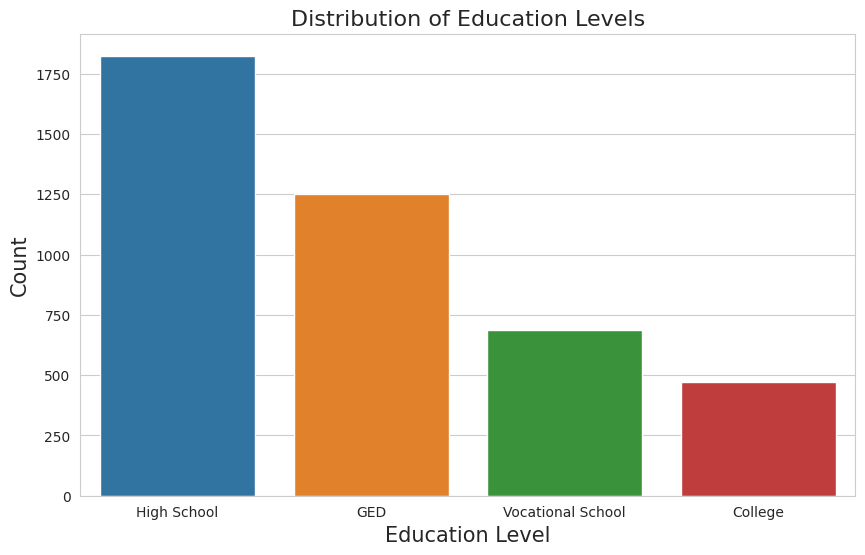

In [ ]:
#Plotting the chart
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.countplot(x='education', data=framingham)

# Adding labels and titles
plt.xlabel("Education Level", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Distribution of Education Levels", fontsize=16)
custom_labels = ['High School', 'GED', 'Vocational School', 'College']
ax.set_xticklabels(custom_labels)

# Show the plot
plt.show()



---


### Question 5: What's the distribution of diseases between genders?

The chart indicates that there is a relatively balanced distribution of all diseases between genders, challenging the initial assumption of researchers that women are significantly less susceptible to developing heart diseases.

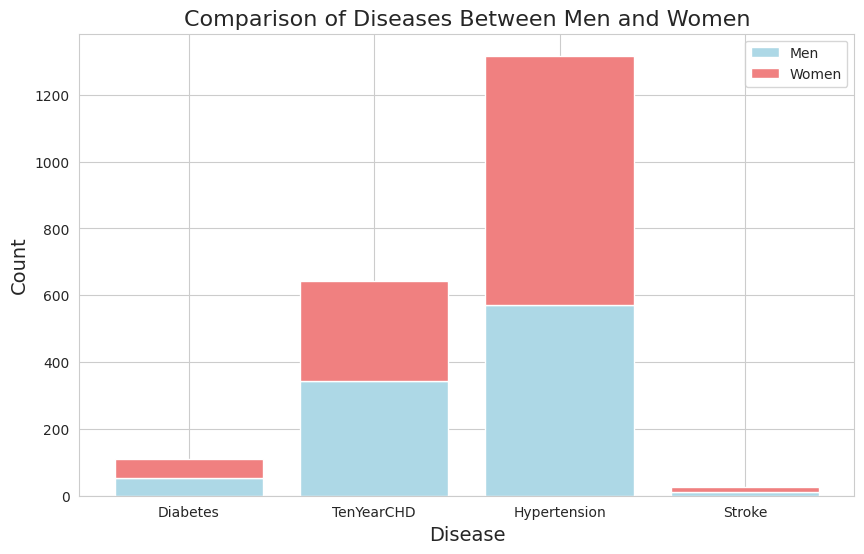

In [ ]:
#Getting the counts of diseases for each gender
diabetes_men = framingham[(framingham['diabetes'] == 1) & (framingham['sex'] == 'male')].count()
diabetes_women = framingham[(framingham['diabetes'] == 1) & (framingham['sex'] == 'female')].count()
CHD_men = framingham[(framingham['TenYearCHD'] == 1) & (framingham['sex'] == 'male')].count()
CHD_women = framingham[(framingham['TenYearCHD'] == 1) & (framingham['sex'] == 'female')].count()
hypertensive_men = framingham[(framingham['prevalentHyp'] == 1) & (framingham['sex'] == 'male')].count()
hypertensive_women = framingham[(framingham['prevalentHyp'] == 1) & (framingham['sex'] == 'female')].count()
stroke_men = framingham[(framingham['prevalentStroke'] == 1) & (framingham['sex'] == 'male')].count()
stroke_women = framingham[(framingham['prevalentStroke'] == 1) & (framingham['sex'] == 'female')].count()

# Putting the data into one list
disease_labels = ['Diabetes', 'TenYearCHD', 'Hypertension', 'Stroke']
men_counts = [diabetes_men['sex'], CHD_men['sex'], hypertensive_men['sex'], stroke_men['sex']]
women_counts = [diabetes_women['sex'], CHD_women['sex'], hypertensive_women['sex'],  stroke_women['sex']]

# Plotting Stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(disease_labels, men_counts, label='Men', color='lightblue')
plt.bar(disease_labels, women_counts, bottom=men_counts, label='Women', color='lightcoral')

# Adding labels and titles
plt.xlabel('Disease', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Comparison of Diseases Between Men and Women', fontsize=16)
plt.legend()
plt.show();






---


### Question 6: Is there a higher risk of heart disease for individuals who smoke more than the average?


From the chart provided, it's evident that the count of individuals at risk for heart disease is approximately three times higher among above-average smokers (count = 1580) compared to those who smoke below-average cigarettes(count = 515) per day.

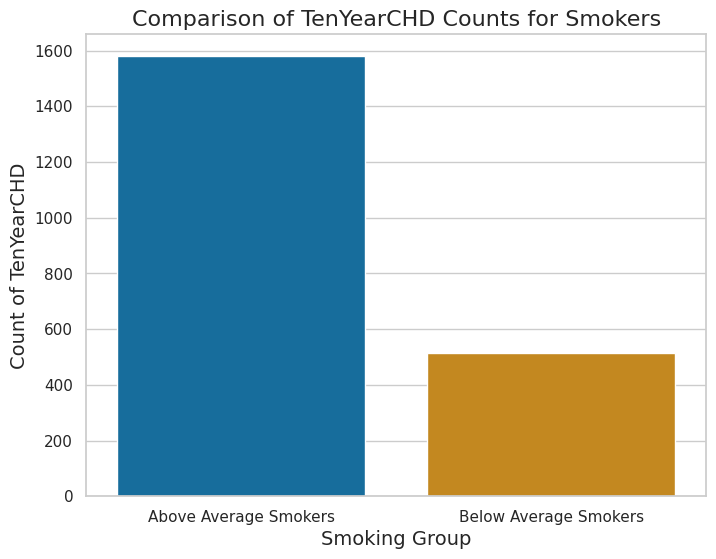

In [ ]:
#Filtering above average and below average smokers and then getting the value count of both
above_avg_smoker = framingham[(framingham['currentSmoker'] == 1) & (framingham['cigsPerDay'] >= 9.005937)]
below_avg_smoker = framingham[(framingham['currentSmoker'] == 1) & (framingham['cigsPerDay'] < 9.005937)]
above_avg_count = above_avg_smoker['TenYearCHD'].count()
below_avg_count = below_avg_smoker['TenYearCHD'].count()

# Creating a countplot to compare the counts
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=['Above Average Smokers', 'Below Average Smokers'], y=[above_avg_count, below_avg_count], palette = 'colorblind')
plt.xlabel("Smoking Group", fontsize=14)
plt.ylabel("Count of TenYearCHD", fontsize=14)
plt.title("Comparison of TenYearCHD Counts for Smokers", fontsize=16)
plt.show()



---


### Question 7: Is there a higher likelihood of developing diabetes among individuals who are overweight?

From the chart provided, it can be observed that diabetes is prevalent in people who have higher BMI. It can be seen that out of 105 Diabetes patients we have in this dataset 76 of them belong to overweight, obese or extremely obese categories which is about 72% of total.

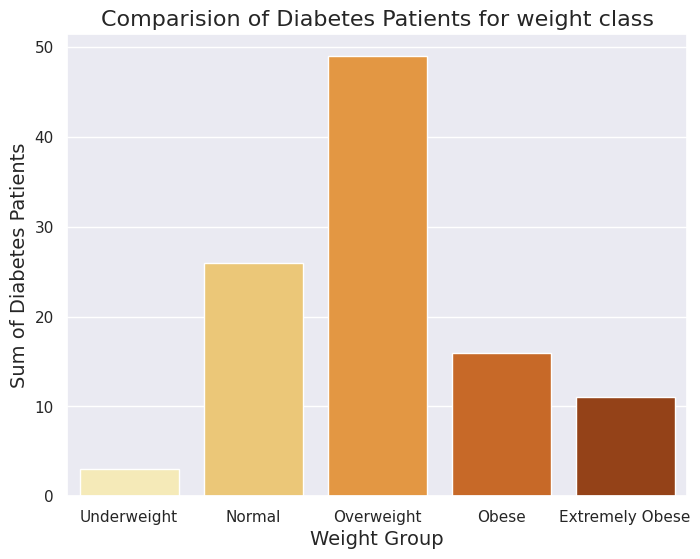

In [ ]:
#Let's use the BMI column to understand which of the patients are obese, to do this I will create buckets within the BMI range which will include 'Underweight', 'Normal', 'Overweight', 'Obese', 'Extremely Obese'
underweight = framingham[framingham['BMI'] < 18.5]
normal = framingham[(framingham['BMI'] > 18.5) & (framingham['BMI'] < 24.9)]
overweight = framingham[(framingham['BMI'] > 25) & (framingham['BMI'] < 29.9)]
obese = framingham[(framingham['BMI'] > 30) & (framingham['BMI'] < 34.9)]
extremely_obese = framingham[framingham['BMI'] > 35]

#Lets get the sum total of all buckets
underweight_sum = underweight['diabetes'].sum()
normal_sum = normal['diabetes'].sum()
overweight_sum = overweight['diabetes'].sum()
obese_sum = obese['diabetes'].sum()
extremely_obese_sum = extremely_obese['diabetes'].sum()

#Plotting the countplot for weight class
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
sns.barplot(x=['Underweight', 'Normal', 'Overweight', 'Obese', 'Extremely Obese'], y=[underweight_sum, normal_sum, overweight_sum, obese_sum, extremely_obese_sum], palette = 'YlOrBr')
plt.xlabel("Weight Group", fontsize=14)
plt.ylabel("Sum of Diabetes Patients", fontsize=14)
plt.title("Comparision of Diabetes Patients for weight class", fontsize=16)
plt.show()



---


### Question 8: How do diastolic and systolic blood pressure measurements relate to the prevalence of hypertension (prevalentHyp) in the Framingham Heart Study dataset?

According to the [World Health Organisation](https://www.who.int/news-room/fact-sheets/detail/hypertension),  Prevalence of hypertension is defined as having systolic blood pressure ≥140 mmHg, diastolic blood pressure ≥90 mmHg, or taking medication for hypertension among adults aged 30-79. We can observe in the chart as well that the yellow dots start to occur right around the area of 90-100 diaBP and 140 sysBP.

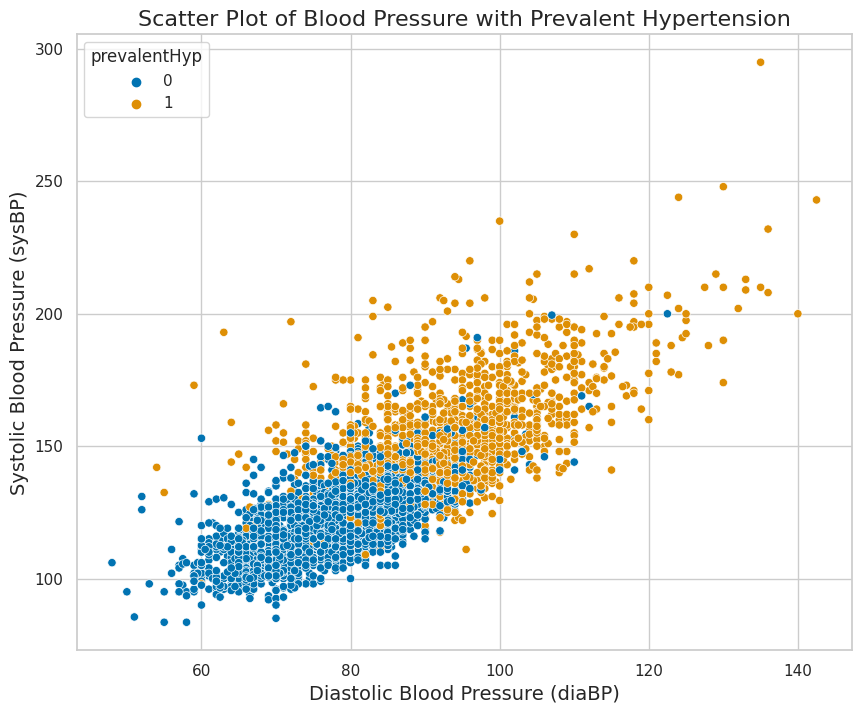

In [ ]:
#Plotting diastolic and systolic blood pressure on the axes and setting the hue as Hypertensive
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
sns.scatterplot(x='diaBP', y='sysBP', hue = 'prevalentHyp', data=framingham, palette="colorblind")

#Labelling the chart
plt.xlabel("Diastolic Blood Pressure (diaBP)", fontsize=14)
plt.ylabel("Systolic Blood Pressure (sysBP)", fontsize=14)
plt.title("Scatter Plot of Blood Pressure with Prevalent Hypertension", fontsize=16)
plt.show();




---


## Conclusion
Framingham Heart Study has been instrumental in shaping our understanding of heart disease and has had a profound influence on public health initiatives, medical guidelines, and healthcare practices. From this EDA, we can observe many relevant inferences that can further help in our understanding of diseases and their relationship with our lifestyle habits and demographics. One of those inferences is that Smoking is a factor in getting heart disease which was earlier considered to be harmless. Another common misconception was debunked when careful analysis showed that women are not necessarily more immune to heart diseases than men. We have also found out that hypertension is correlated with systolic and diastolic blood pressure. In general, this study still holds a considerable amount of untapped potential that can be further harnessed by employing more advanced analytical methods.





---


## References

1. "Hypertension." *World Health Organization*. 16 March 2023. https://www.who.int/news-room/fact-sheets/detail/hypertension



---







